# ARTICLE CLUSTERS

## Cluster Inertia

Cluster article data and compute inertia as a function of cluster number

In [1]:
from sklearn import cluster
import pandas as pd
import numpy as np
import pickle

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
num_topics = 20
doc_data = pickle.load(open('pub_probabs_topic'+str(num_topics)+'.pkl','rb'))
lda_topics = ['topic'+str(i) for i in range(0,num_topics)]
cluster_dims = ['source','trust'] + lda_topics
cluster_data = doc_data[cluster_dims].values

In [7]:
# Inertia (within-cluster sum of squares criterion) is a measure of how internally coherent clusters are
MAX_K = 10
ks = range(1,MAX_K+1)
inertias = np.zeros(MAX_K)
for k in ks:
    kmeans = cluster.KMeans(k).fit(cluster_data)
    inertias[k-1] = kmeans.inertia_

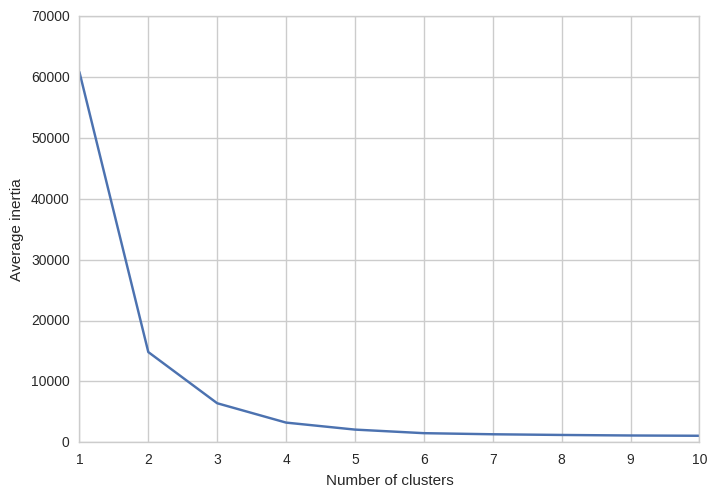

In [9]:
with sns.axes_style("whitegrid"):
    plt.plot(ks, inertias)
    plt.ylabel("Average inertia")
    plt.xlabel("Number of clusters")
    plt.show()

## Silhouette Score

Cluster article data and compute the silhouette score as a function of cluster number

In [10]:
from sklearn.metrics import silhouette_score
import random

In [11]:
num_topics = 20
doc_data = pickle.load(open('pub_probabs_topic'+str(num_topics)+'.pkl','rb'))
lda_topics = ['topic'+str(i) for i in range(0,num_topics)]
cluster_dims = ['source','trust'] + lda_topics
cluster_data = doc_data[cluster_dims].values

In [12]:
# The silhouette score is a measure of the density and separation of the formed clusters
seed = 42
MAX_K = 10
ks = range(1,MAX_K+1)
silhouette_avg = []
for i,k in enumerate(ks[1:]):    
    kmeans = cluster.KMeans(n_clusters=k,random_state=seed).fit(cluster_data)
    kmeans_clusters = kmeans.predict(cluster_data)
    silhouette_avg.append(silhouette_score(cluster_data,kmeans_clusters))

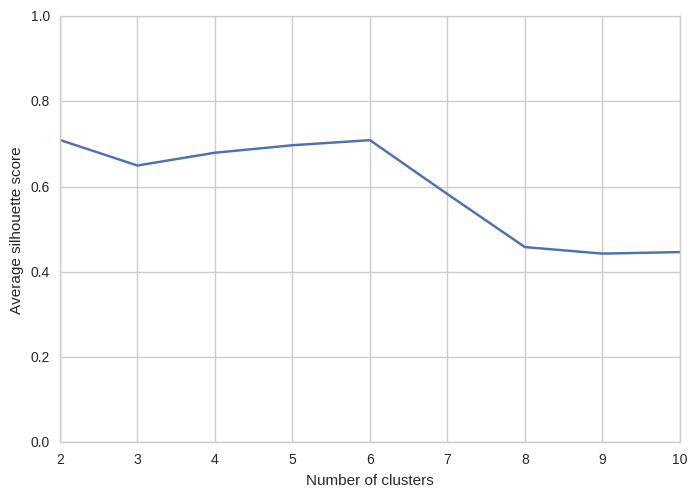

In [14]:
with sns.axes_style("whitegrid"):
    plt.plot(ks[1:], silhouette_avg)
    plt.ylabel("Average silhouette score")
    plt.xlabel("Number of clusters")
    plt.ylim([0.0,1.0])
    plt.show()

## Cross-Validation

Split data set for cross-validation

In [96]:
num_topics = 20
doc_data = pickle.load(open('pub_probabs_topic'+str(num_topics)+'.pkl','rb'))
lda_topics = ['topic'+str(i) for i in range(0,num_topics)]
cluster_dims = ['source','trust'] + lda_topics
cluster_data = doc_data[cluster_dims].values

In [97]:
num_folds = 5
seed = 42
np.random.seed(seed)
np.random.shuffle(cluster_data) # Shuffles in-place
cluster_data = np.split(cluster_data[0:-1,:],num_folds) # Make divisible by 10

In [98]:
train_data,test_data= [],[]
for hold in range(num_folds):
    keep = [i for i in list(range(num_folds)) if i != hold]
    train = [cluster_data[i] for i in keep]
    test = cluster_data[hold]
    train_data.append(np.vstack(train))
    test_data.append(test)
    
full = [cluster_data[i] for i in list(range(num_folds))]
full_data = np.vstack(full)

Clustering consistency between the full and partial data sets

In [112]:
MAX_K = 10
ks = range(1,MAX_K+1)
kmeans_accuracy = []
for k in ks:
    full_kmeans = cluster.KMeans(n_clusters=k,random_state=seed).fit(full_data)
    accuracy = []
    for fold in range(num_folds):        
        train_kmeans = cluster.KMeans(n_clusters=k,random_state=seed).fit(train_data[fold])
        test_labels = train_kmeans.predict(test_data[fold])
        full_labels = np.split(full_kmeans.labels_,num_folds)[fold]
        accuracy.append(1.0 * np.sum(np.equal(full_labels,test_labels)) / len(test_labels))
    kmeans_accuracy.append(np.mean(accuracy))

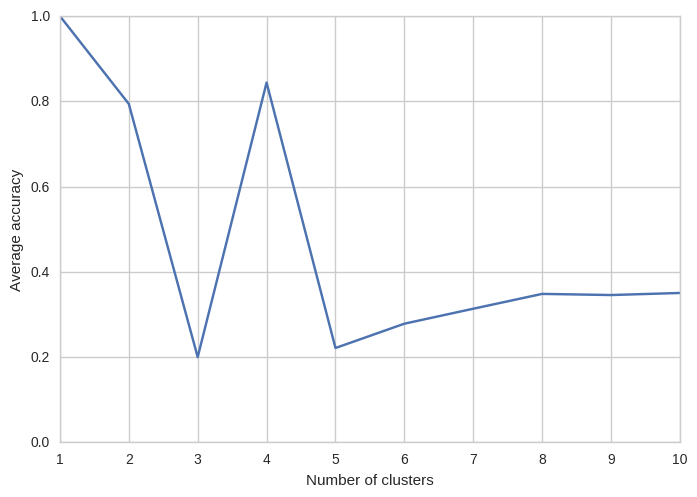

In [122]:
with sns.axes_style("whitegrid"):
    plt.plot(ks, kmeans_accuracy)
    plt.ylabel("Average accuracy")
    plt.xlabel("Number of clusters")
    plt.ylim([0.0,1.0])
    plt.show()

## Number of Clusters = 4

In [ ]:
num_clusters = 4

In [ ]:
kmeans = cluster.KMeans(n_clusters=num_clusters,random_state=seed).fit(full_data)
kmeans_labels = kmeans.labels_
kmeans_centroids = kmeans.cluster_centers_
# 0 = mostly liberal, 1 = mostly conservative, 2 = mixed liberal, 3 = mixed conservative
kmeans_distances = kmeans.transform(full_data)

pickle.dump([kmeans,kmeans_labels,kmeans_centroids,kmeans_distances],
            open('pub_kmeans_clean_cluster'+str(num_clusters)+'.pkl','wb'))